In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

# Data Preparation and Cleaning

In [3]:
data = pd.read_csv('amazon.csv')

In [4]:
#Check shape of dataframe, there are close to 1500 rows, and 16 columns- great for analysis
data.shape

(1465, 16)

In [5]:
# Check for missing values
print(data.isnull().sum()) # 2 missing values on rating_count
data[data.rating_count.isnull()] # Show which rows have missing values - need to remove!

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [6]:
#Drop the missing values
data.dropna(subset=['rating_count'], inplace=True)
print(data.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [7]:
# Check for duplicate, none found, no actions needed!
print(data.duplicated().sum())

0


In [8]:
#Put the cleaned data into 2 dataframes for further analysis
cleanData1 = pd.DataFrame(data[['rating','review_title','review_content']])
cleanData2 = pd.DataFrame(data[['product_name', 'category', 'rating', 'rating_count', 'user_id', 'product_link']])

In [9]:
cleanData1.head()

,rating,review_title,review_content
0,4.2,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,4.0,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,3.9,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,4.2,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,4.2,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


In [10]:
cleanData1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rating          1463 non-null   object
 1   review_title    1463 non-null   object
 2   review_content  1463 non-null   object
dtypes: object(3)
memory usage: 45.7+ KB


In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


import re

# Remove special characters from review content strings
cleanData1['review_content'] = cleanData1['review_content'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# Drop rows with empty strings
cleanData1 = cleanData1[cleanData1['review_content'] != '']
cleanData1['review_content'] = cleanData1['review_content'].astype(str)

cleanData1['rating'] = pd.to_numeric(cleanData1['rating'], errors='coerce')
cleanData1 = cleanData1.dropna(subset=['rating'])
# Assuming cleandata1 is your DataFrame
# Assuming cleandata1['review_content'] contains the review sentences
# Assuming cleandata1['ratings'] contains the ratings

# Preprocess your data if needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cleanData1['review_content'], cleanData1['rating'], test_size=0.2, random_state=42)

# Initialize a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectors = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vectors = vectorizer.transform(X_test)

# Initialize a Random Forest Regressor model
model = RandomForestRegressor()

# Train the model
model.fit(X_train_vectors, y_train)

# Predict ratings for the testing data
y_pred = model.predict(X_test_vectors)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)

In [31]:
print("Mean Squared Error:", mse)
print()

Mean Squared Error: 0.0658752901023892


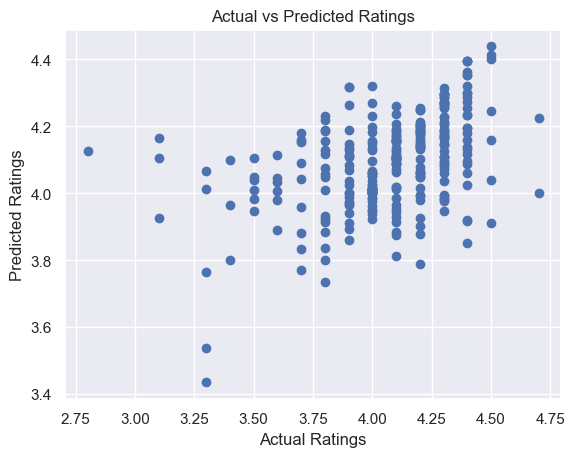

In [32]:
import matplotlib.pyplot as plt

# Plot actual vs predicted ratings
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

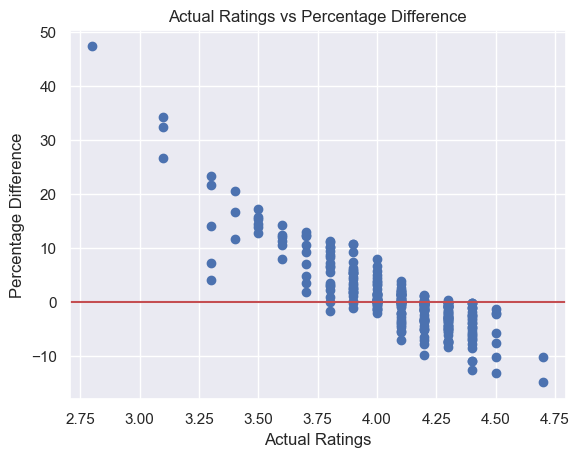

In [33]:
percentage_difference = ((y_pred - y_test) / y_test) * 100

# Plot percentage difference
plt.scatter(y_test, percentage_difference)
plt.xlabel("Actual Ratings")
plt.ylabel("Percentage Difference")
plt.title("Actual Ratings vs Percentage Difference")
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at 0 for reference
plt.show()

In [74]:
import os

reviews = cleanData1.review_content.str.cat(sep=' ')
tokens = word_tokenize(reviews)
vocab = set(tokens)
print(len(vocab))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist, key=frequency_dist.__getitem__, reverse=True)


24242


[',',
 '.',
 'the',
 'is',
 'and',
 'to',
 'it',
 'for',
 'a',
 'I',
 'of',
 'good',
 'this',
 'in',
 'product',
 'with',
 'not',
 'but',
 'you',
 'on',
 '--',
 'as',
 'my',
 'have',
 'quality',
 'that',
 'very',
 "'s",
 'The',
 'are',
 '*',
 'It',
 ')',
 'be',
 'was',
 'Good',
 'use',
 ':',
 "n't",
 'can',
 '(',
 'at',
 'so',
 'one',
 'cable',
 'price',
 'if',
 'or',
 'from',
 'like',
 'will',
 'which',
 'i',
 'also',
 'has',
 'phone',
 'all',
 'using',
 '..',
 'only',
 'after',
 'its',
 'no',
 'charging',
 'more',
 'do',
 'time',
 'well',
 'working',
 '...',
 '!',
 'than',
 'But',
 'when',
 'This',
 'buy',
 'just',
 'easy',
 'other',
 'any',
 'battery',
 'does',
 '-',
 'your',
 'watch',
 'get',
 'am',
 'used',
 '’',
 'an',
 'money',
 '&',
 'me',
 'some',
 'even',
 'better',
 'sound',
 'by',
 'there',
 'up',
 'been',
 'would',
 'go',
 'great',
 'works',
 '2',
 'then',
 'really',
 'they',
 'too',
 'about',
 'best',
 'had',
 'Nice',
 'Very',
 'fast',
 'much',
 'got',
 'out',
 'fine',
 '

In [75]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
tokens

['Looks',
 'durable',
 'Charging',
 'fine',
 'tooNo',
 'complains',
 ',',
 'Charging',
 'really',
 'fast',
 ',',
 'good',
 'product.',
 ',',
 'Till',
 'satisfied',
 'quality.',
 ',',
 'This',
 'good',
 'product',
 '.',
 'The',
 'charging',
 'speed',
 'slower',
 'original',
 'iPhone',
 'cable',
 ',',
 'Good',
 'quality',
 ',',
 'would',
 'recommend',
 ',',
 'https',
 ':',
 '//m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81',
 '--',
 '-F1ZgHL._SY88.jpg',
 ',',
 'Product',
 'worked',
 'well',
 'till',
 'date',
 'issue.Cable',
 'also',
 'sturdy',
 'enough',
 '...',
 'Have',
 'asked',
 'replacement',
 'company',
 '...',
 ',',
 'Value',
 'money',
 'I',
 'ordered',
 'cable',
 'connect',
 'phone',
 'Android',
 'Auto',
 'car',
 '.',
 'The',
 'cable',
 'really',
 'strong',
 'connection',
 'ports',
 'really',
 'well',
 'made',
 '.',
 'I',
 'already',
 'Micro',
 'USB',
 'cable',
 'Ambrane',
 "'s",
 'still',
 'good',
 'shape',
 '.',
 'I',
 'connected',
 'phone',
 'car',
 'using',
 'cable',
 

<function matplotlib.pyplot.show(close=None, block=None)>

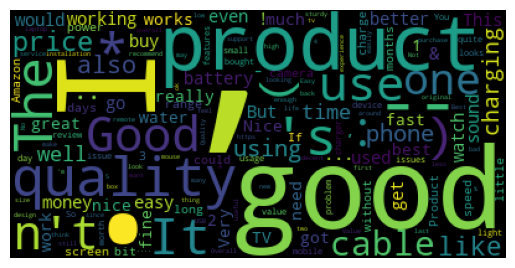

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud()
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist, key=frequency_dist.__getitem__, reverse=True)
wordcloud.generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show

In [86]:
trainx, testx, trainy, testy = train_test_split(tokens, cleanData1['rating'], test_size = 0.25, random_state=2)

ValueError: Found input variables with inconsistent numbers of samples: [276792, 1463]

In [85]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(trainx)
test_vectors = vectorizer.transform(testx)
print(train_vectors.shape, test_vectors.shape)

(1097, 12358) (366, 12358)


# Attempts at text classification

In [37]:


# create a list text

text = list(cleanData1['review_content'])




# preprocessing loop

import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()




corpus = []




for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', text[i])

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('english')]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = ' '.join(r)

    corpus.append(r)




#assign corpus to data['text']

data['text'] = corpus

data.head()

[nltk_data] Error loading all: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/dinglinlee/nltk_data'
    - '/Users/dinglinlee/anaconda3/nltk_data'
    - '/Users/dinglinlee/anaconda3/share/nltk_data'
    - '/Users/dinglinlee/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [38]:
cleanData2.head()

,product_name,category,rating,rating_count,user_id,product_link
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,"24,269","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.0,"43,994","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",https://www.amazon.in/Ambrane-Unbreakable-Char...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,"7,928","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",https://www.amazon.in/Sounce-iPhone-Charging-C...
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,"94,363","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",https://www.amazon.in/Deuce-300-Resistant-Tang...
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,"16,905","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",https://www.amazon.in/Portronics-Konnect-POR-1...


In [8]:
cleanData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  1465 non-null   object
 1   category      1465 non-null   object
 2   rating        1465 non-null   object
 3   rating_count  1463 non-null   object
 4   user_id       1465 non-null   object
 5   product_link  1465 non-null   object
dtypes: object(6)
memory usage: 68.8+ KB


# Exploratory Data Analysis
